<a href="https://colab.research.google.com/github/gibi177/CIS--PS/blob/main/Modulo%202/Atividade%20Clustering/Atividade_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de Classificação

## Felipe Gibin

### 1. Observação dos dados

#### 1.1 Carrega o dataset

In [16]:
import pandas as pd

#Carregar o dataset, que usa ; como delimitador
df = pd.read_csv('student_habits_performance.csv')

#Remove coluna 'student_id'
df = df.drop('student_id', axis=1)

#Visualizar primeiras linhas
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#### 1.2 Hipóteses

Apenas observando os dados da tabela, e aplicando intuição, vamos levantar algumas hipóteses.

1) Há uma relação entre exercise_frequency e mental_health_rating, onde ambas contribuem para o desempenho acadêmico.

2) Estudantes com horas de sono adequadas tendem a ter notas mais altas.

3) Estudantes com social_media_hours e netflix_hours altas tendem a ter notas mais baixas.

4) Estudantes com study_hours_per_day e attendance_percentage altos tendem a ter notas mais altas.

### 2. Análise exploratória de dados (EDA)

#### 2.1 Análise inicial

In [11]:
# Análise inicial
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

#### 2.2 Trata valores faltantes

In [12]:
#Soma os valores zero e NaN por coluna
NaN_values = df.isna().sum()

Zero_values = (df == 0).sum()

# Mostrar resultado
print("Contagem NaN por coluna:")
print(NaN_values)

print("\nContagem zeros por coluna:")
print(Zero_values)

Contagem NaN por coluna:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Contagem zeros por coluna:
student_id                         0
age                                0
gender                             0
study_hours_per_day               13
social_media_hours                21
netflix_hours                     59
part_time_job                      0
attendance_percentage              0
sleep_hours                        0
diet_quality             

Nesse caso, precisamos apenas imputar os valores NaN na coluna parental_education_level. Não vamos imputar os zeros, visto que as colunas com valores nulos correspondem a features onde esse valor é completamente normal. Já que as linhas com valores NaN correspondem à 9.1% do total de linhas do dataset, ou seja, um valor significativo, não é recomendado usar dropna(). Portanto, vamos substituir esses valores pela moda da coluna.

In [13]:
# Imputação com a moda, visto que se trata de uma feature com dados categóricos
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

#### 2.3 Distribuição dos dados numéricos

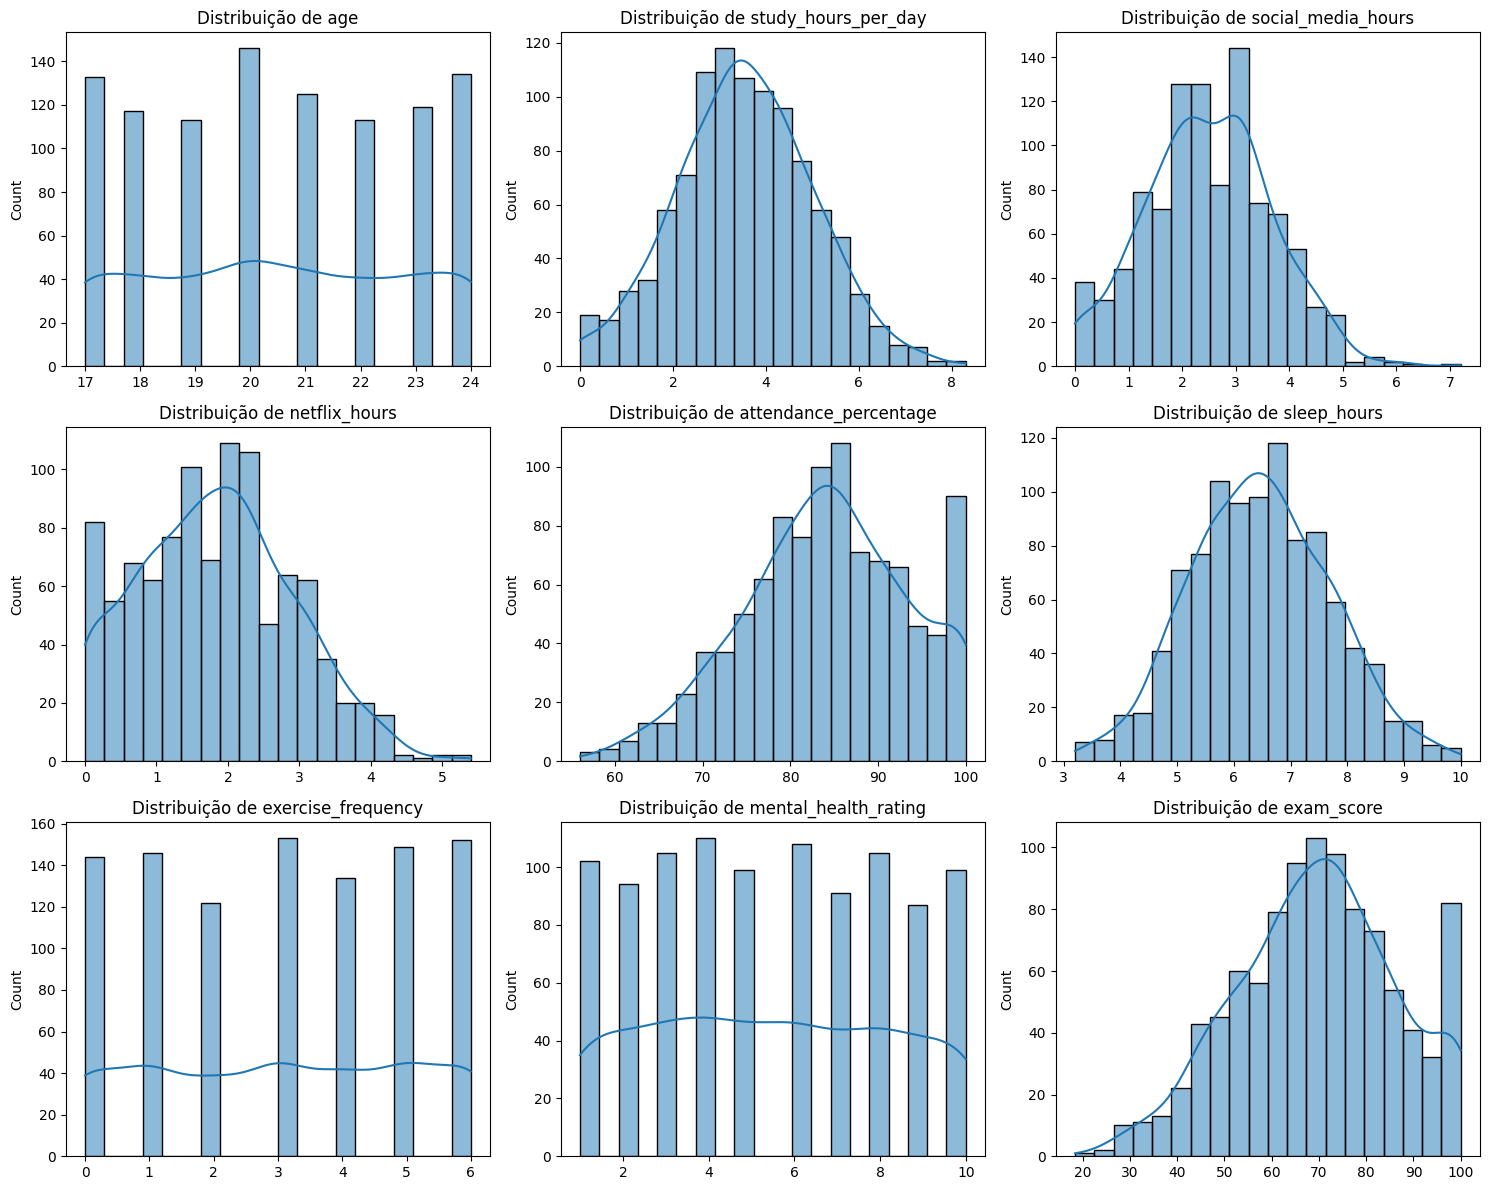

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Colunas dos dados numéricos
numeric_data = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 12))

# Histogramas com curvas de densidade
for i, var in enumerate(numeric_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Distribuição de {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

#### 2.4 Distribuição dos dados categóricos


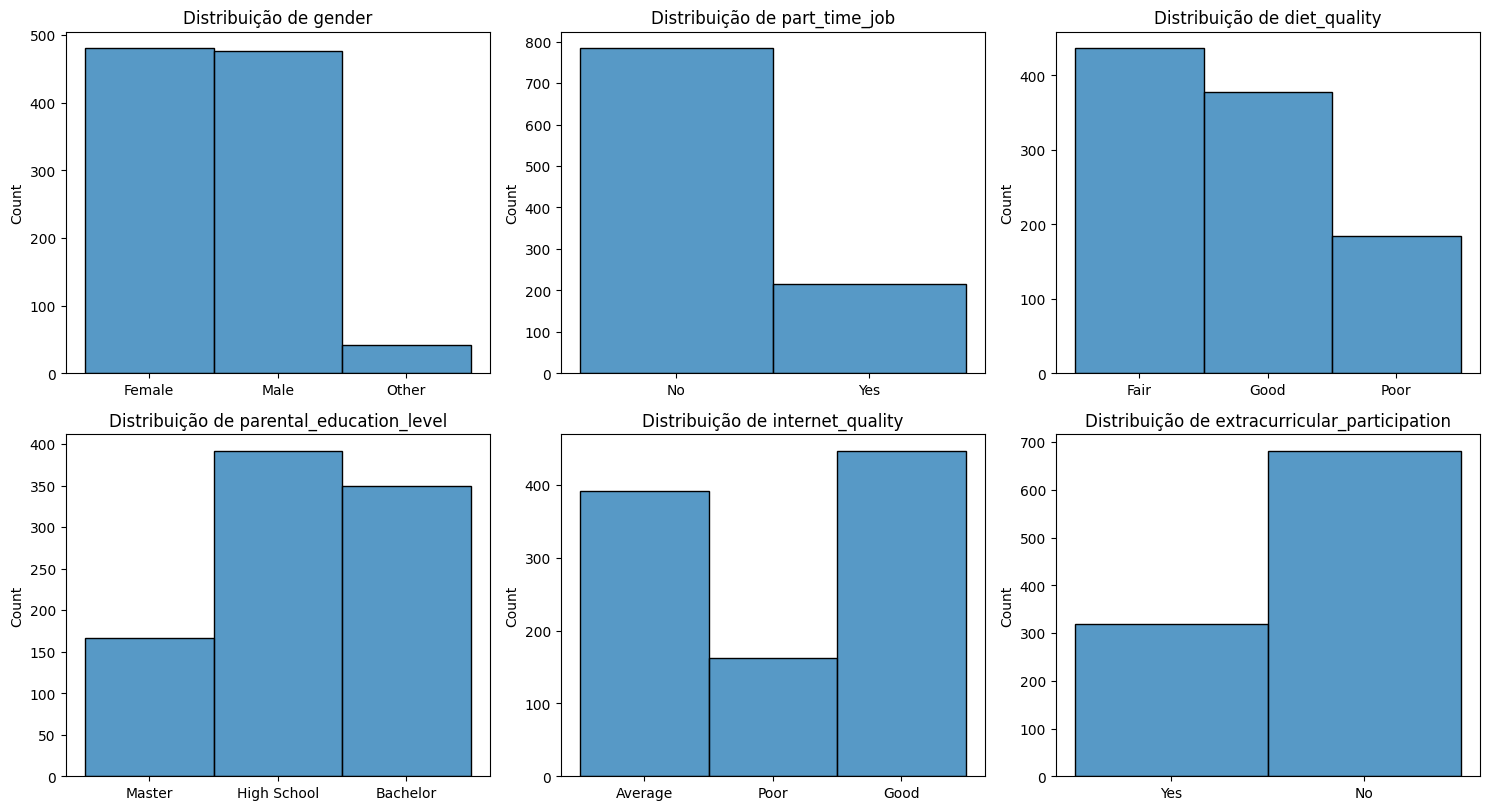

In [21]:
#Colunas dos dados categóricos
categoric_data = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 12))

# Histogramas com curvas de densidade
for i, var in enumerate(categoric_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=False, discrete=True)
    plt.title(f'Distribuição de {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Analisando as distribuições, dou destaque à algumas observações:

1) Colunas numéricas: exam_score teve distribuição deslocada à direita, o que indica que o teste foi fácil. mental_health_rating e exercise_frequency são surpreendentemente uniformes,com representatividade bastante equilibrada entre todos os valores. social_media_hours e netflix_hours são surpreendetemente altas, considerando que uma não é contabilizada no tempo da outra, estudantes gastam tempo considerável diário nessas atividades. Levanta-se a dúvida se study_hours_per_day considera as horas de aula; caso não inclua, é um parâmetro bem elevado para essa estatística.

1) Colunas categóricas: surpreende que diet_quality seja majoritariamente classificada como "Good" ou "Average", visto que se trata de estudantes;

#### 2.5 Investigando correlações



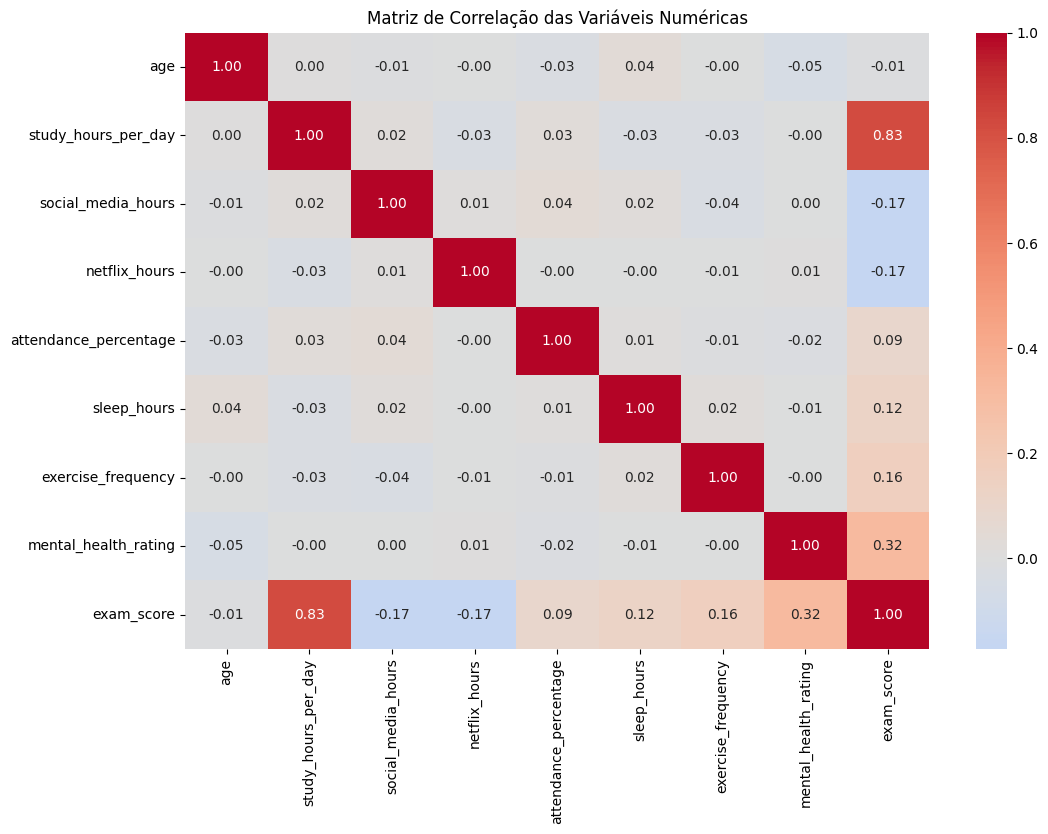

In [23]:
# Calcular a matriz de correlação
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

Observamos uma colinearidade negligenciada, e as três variáveis que mais impactam o rendimento acadêmico são: study_hours_per_day e mental_health_rating, que têm impacto positivo, e social_media_hours e netflix_hours, que têm impacto negativo.

#### 2.6 Visualização por scatterplot de variáveis de interesse

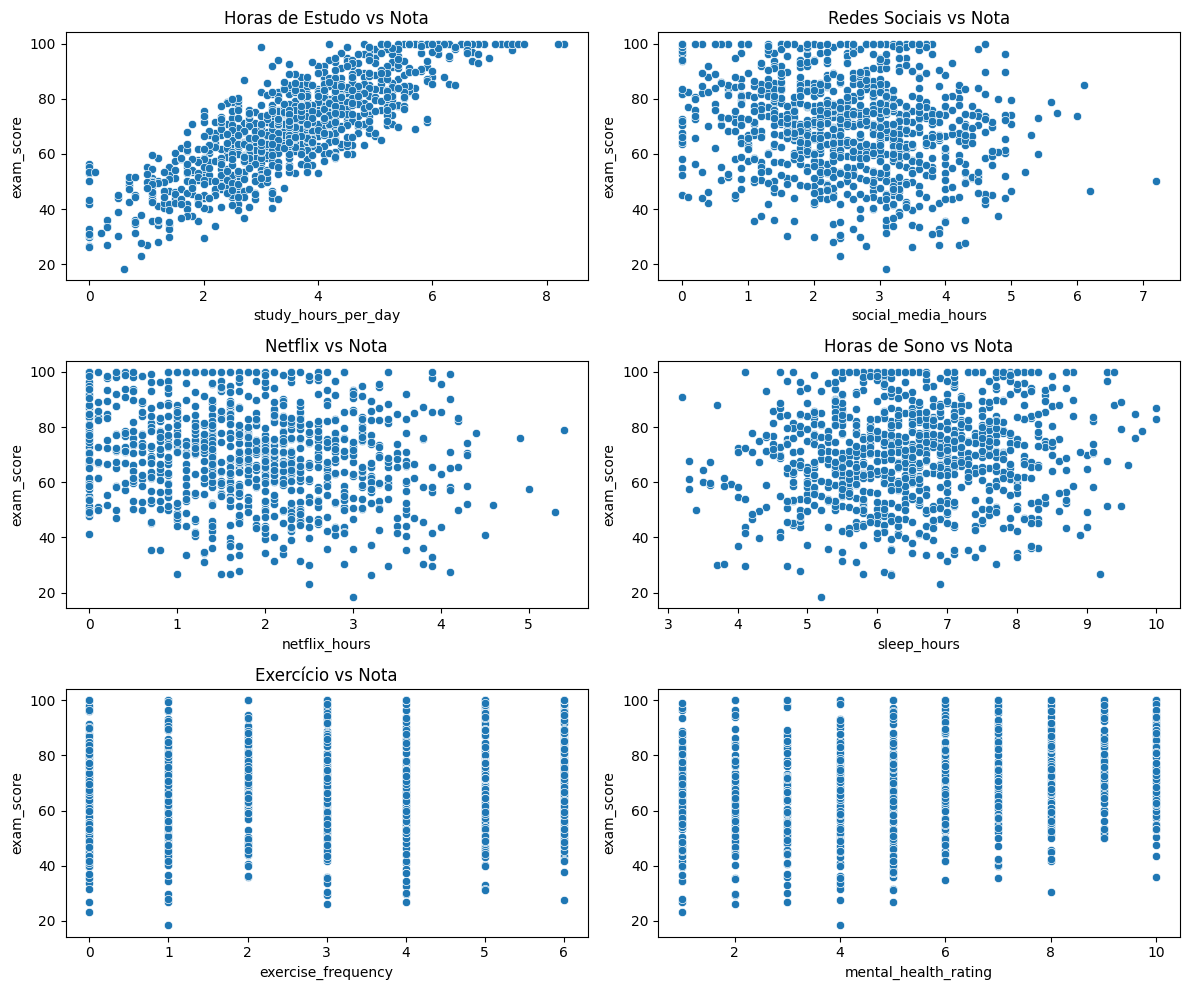

In [31]:
# Tamanho da figura para todas as imagens
plt.figure(figsize=(12, 10))

# Relação entre study_hours_per_day e exam_score
plt.subplot(3, 2, 1)
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Horas de Estudo vs Nota')

# Relação entre social_media_hours e exam_score
plt.subplot(3, 2, 2)
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title('Redes Sociais vs Nota')

# Relação entre netflix_hours e exam_score
plt.subplot(3, 2, 3)
sns.scatterplot(x='netflix_hours', y='exam_score', data=df)
plt.title('Netflix vs Nota')

# Relação entre sleep_hours e exam_score
plt.subplot(3, 2, 4)
sns.scatterplot(x='sleep_hours', y='exam_score', data=df)
plt.title('Horas de Sono vs Nota')

# Relação entre exercise_frequency e exam_score
plt.subplot(3, 2, 5)  # Ajustado para a grade 3x2
sns.scatterplot(x='exercise_frequency', y='exam_score', data=df)
plt.title('Exercício vs Nota')

# Relação entre mental_health_rating e exam_score
plt.subplot(3, 2, 6)  # Ajustado para a grade 3x2
sns.scatterplot(x='mental_health_rating', y='exam_score', data=df)

plt.tight_layout()
plt.show()

Com excessão das horas de estudos, os outros plots não apresentam tendências visuais óbvias.

### 3. Revisão das hipóteses


Revisando as hipóteses levantadas, observamos que:

1) Parcialmente correta. Não parece haver correlação entre exercise_frequency e mental_health_rating, o que me surpreende muito. Além disso, exercise_frequency e exam_score possuem correlação de 0.16 (fraca positiva), e mental_health_rating e exam_score possuem correlação de 0.32 (média positiva). Embora ambas influenciem o desempenho acadêmico, esperava uma correlação mais forte entre elas e com a variável alvo.

2) Correta. sleep_hours e exam_score possuem correlação de 0.12 (fraca positiva). Mais uma vez, esperava uma contribuição mais forte, mas há uma relação, ainda que reduzida.

3) Correta. As correlações entre social_media_hours, netflix_hours com exam_score foram ambas consideradas fracas negativas, com -0.17 para as duas.

4) Parcialmente correta. study_hours_per_day e exam_score possuem uma correlação muito forte de 0.83, mas attendance_percentage tem uma correlação muito fraca positiva de 0.09 com exam_score.

Vale lembrar que essa reavaliação das hipóteses é baseada na matriz de correlação, que apresenta correlações simples, que podem não refletir o impacto real ou total dessas features na variável alvo.

### 4. Algoritmo de K-Means from scratch